# Solving XOR using a neural network

XOR, or "exclusive or" is a simple function on 2 input values x_1 and x_2. 


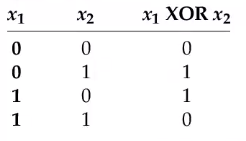

It cannot be separated by a single decision boundary

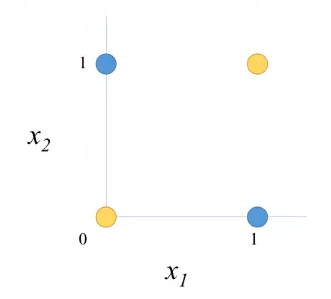


We are going to make a network with 1 hidden layer of 2 neurons, approximating the XOR function. Since this is a binary classification problem we'll use the sigmoid activation function.

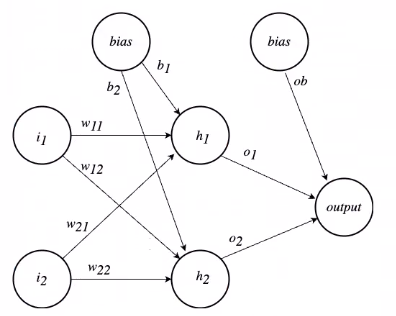


In [1]:
import random
import math
import numpy as np

In [2]:
# Random init weights and biases.
VARIANCE = 0.5
w11 = random.uniform(-VARIANCE,VARIANCE)
w21 = random.uniform(-VARIANCE,VARIANCE)
b1 = random.uniform(-VARIANCE,VARIANCE)

w12 = random.uniform(-VARIANCE,VARIANCE)
w22 = random.uniform(-VARIANCE,VARIANCE)
b2 = random.uniform(-VARIANCE,VARIANCE)

o1 = random.uniform(-VARIANCE,VARIANCE)
o2 = random.uniform(-VARIANCE,VARIANCE)
ob = random.uniform(-VARIANCE,VARIANCE)


In [3]:
# Our activation function for hidden units
def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

# Derivative of sigmoid function.
def dSigmoid(x): # x already sigmoided from layer activation.
    return x * (1 - x)


def predict(i1,i2):    
    h1 = w11 * i1 + w21 * i2 + b1
    h1 = sigmoid(h1)
    h2 = w12 * i1 + w22 * i2 + b2
    h2 = sigmoid(h2)

    output = h1 * o1 + h2 * o2 + ob
    output = sigmoid(output)
    
    return output, h1, h2

def learn(i1,i2,target, lr=0.2):
    global w11,w21,b1,w12,w22,b2
    global o1,o2,ob

    # ---- Forward pass
    output, h1, h2 = predict(i1,i2)
    
    # --- Calculate error and our derivate
    error = (output - target) # MAE
    derror = error * dSigmoid(output)

    # Update output weights and bias.
    o1 -= lr * h1 * derror
    o2 -= lr * h2 * derror
    ob -= lr * derror

    # Get the gradient for the hidden layers.
    dh1 = derror * o1 * dSigmoid(h1)
    dh2 = derror * o2 * dSigmoid(h2)

    # Update hidden layer weights and bias.
    w11 -= lr * i1 * dh1
    w21 -= lr * i2 * dh1
    b1 -= lr * dh1
    w12 -= lr * i1 * dh2
    w22 -= lr * i2 * dh2
    b2 -= lr * dh2


In [4]:

INPUTS = [
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ]

OUTPUTS = [
        [0],
        [1],
        [1],
        [0]
    ]

for epoch in range(1,10001):
    indexes = [0,1,2,3]
    random.shuffle(indexes)
    for j in indexes:
        learn(INPUTS[j][0],INPUTS[j][1],OUTPUTS[j][0], lr=0.2)
    
    if epoch%1000 == 0:
        cost = 0
        for j in range(4):
            o, _, _= predict(INPUTS[j][0],INPUTS[j][1])
            cost += (OUTPUTS[j][0] - o) ** 2
        cost /= 4
        print("epoch", epoch, "mean squared error:", cost)       
        

for i in range(4):
    result, _, _= predict(INPUTS[i][0],INPUTS[i][1])
    print("for input", INPUTS[i], "expected", OUTPUTS[i][0], "predicted", f"{result:4.4}", "which is", "correct" if round(result)==OUTPUTS[i][0] else "incorrect")


epoch 1000 mean squared error: 0.24993621093349222
epoch 2000 mean squared error: 0.24938405331129568
epoch 3000 mean squared error: 0.22638413940403063
epoch 4000 mean squared error: 0.1420443858074853
epoch 5000 mean squared error: 0.13186085240562656
epoch 6000 mean squared error: 0.1291238442962127
epoch 7000 mean squared error: 0.12791078833074215
epoch 8000 mean squared error: 0.12723615805151992
epoch 9000 mean squared error: 0.1268051771556548
epoch 10000 mean squared error: 0.12651176480321585
for input [0, 0] expected 0 predicted 0.03268 which is correct
for input [0, 1] expected 1 predicted 0.9652 which is correct
for input [1, 0] expected 1 predicted 0.4977 which is incorrect
for input [1, 1] expected 0 predicted 0.5015 which is incorrect


It does not always learn perfectly since this is a very crude network with a fixed learning rate and fixed nr epochs. But if you run it a couple times it should converge into a network shich can correctly classify all possible xor inputs.